In [1]:
#All Data
allData=[]
dataPath=r'Bank(N)_v2.csv'
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     allData.append(r)
#Feature Label
feature=[]
#Pure Data
pureData=[]
for r in range(0,len(allData)):
    #Row Data
    rowData=[]
    for c in range(0,len(allData[r])):
        rowData.append(allData[r][c])
    if(r==0):
        feature=rowData
    else:
        pureData.append(rowData)
X=[]
y=[]
for r in range(0,len(pureData)):
    #Row Data
    rowData=[]
    for c in range(0,len(pureData[r])-1):
        rowData.append(float(pureData[r][c]))
    X.append(rowData)
    y.append(float(pureData[r][len(pureData[r])-1])/1000)
#Scale
scale=0.3
from sklearn.model_selection import train_test_split
#訓練集(Feature),測試集(Feature),訓練集(Class),測試集(Class)
Xtrain, Xtest, ytrain, ytest =train_test_split(X, y, test_size=scale)

In [9]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(Xtrain, ytrain)
ypred = model.predict(Xtest)

Text(0.5, 1.0, 'Random Forest')

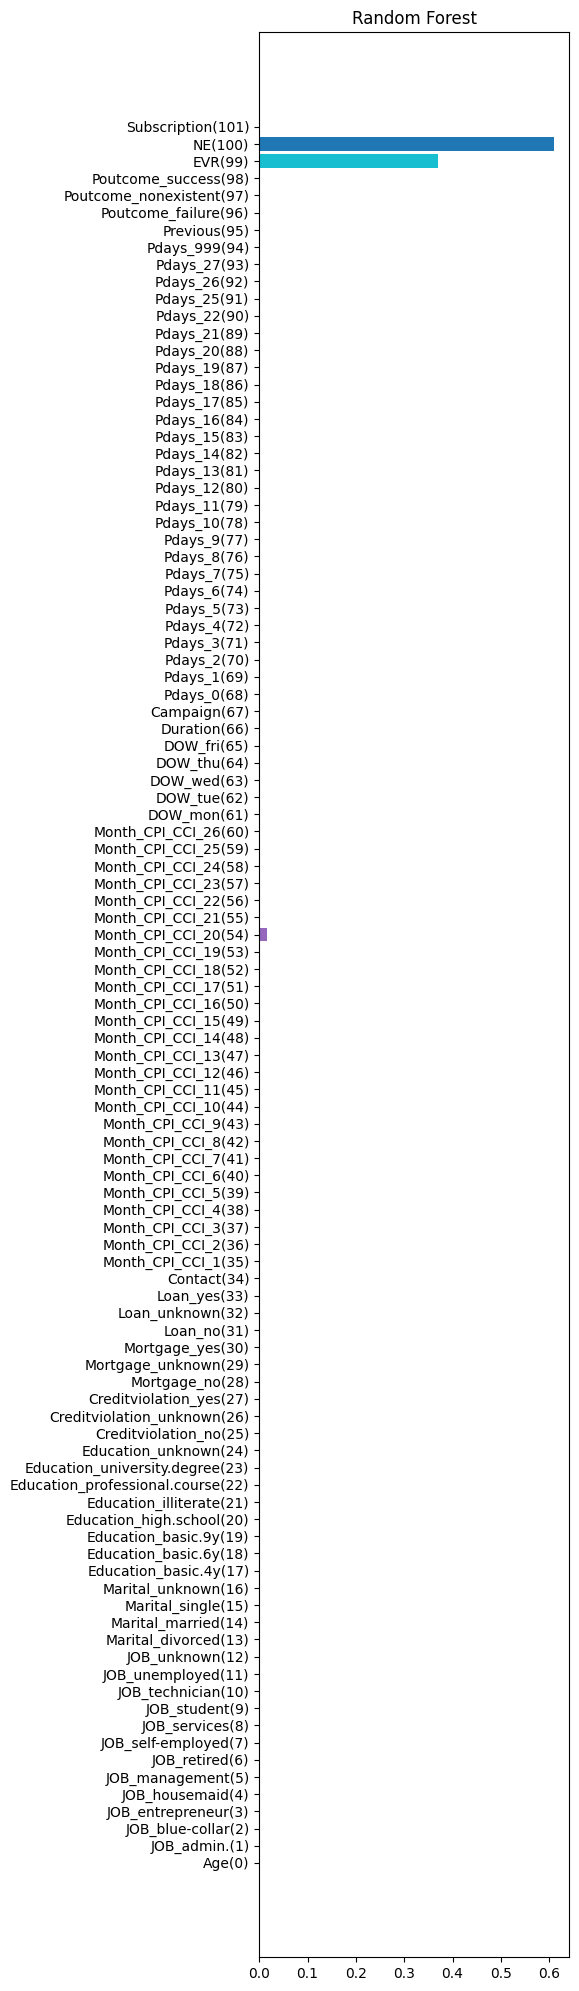

In [11]:
import numpy as np
import matplotlib.pyplot as FeturePlt
feature_Importance=[]
for f in model.feature_importances_:
    feature_Importance.append(f)
FeturePlt.figure(figsize=(4,25))
for f in range(0,len(feature_Importance)):
    FeturePlt.barh(feature[f]+"("+str(f)+")", feature_Importance[f])
FeturePlt.title("Random Forest")


訓練準確率:  0.9999701703410219
測試準確率:  0.9997752977257741
MSE:  0.0006799293324998028
RMSE:  0.026075454598142728
MAPE:  0.006395121343430698


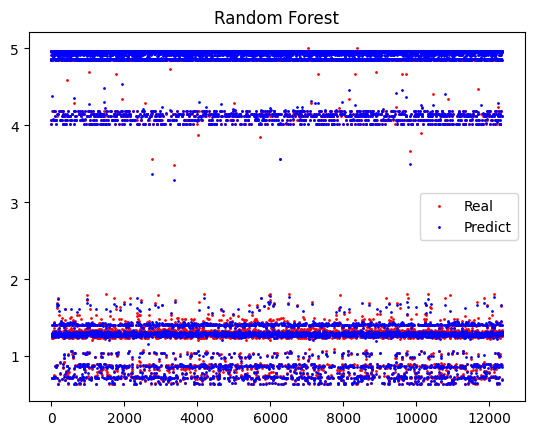

In [12]:
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(Xtrain, ytrain))
print("測試準確率: ",model.score(Xtest, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("Random Forest")
plt.legend()
plt.show()

訓練準確率:  0.9994395736832317
測試準確率:  0.9944263254275016
MSE:  0.016865449380545443
RMSE:  0.12986704501352697
MAPE:  0.012805131603647917


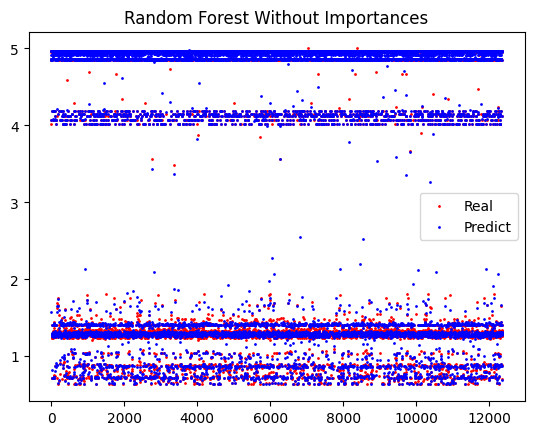

In [13]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtrain)):
    daArray=[]
    for col in range(0,len(Xtrain[tra])):
        if(col!=54 and col!=99 and col!=100):
            daArray.append(Xtrain[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col!=54 and col!=99 and col!=100):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytrain)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytrain))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("Random Forest Without Importances")
plt.legend()
plt.show()

訓練準確率:  0.9987041553159469
測試準確率:  0.9986425268267971
MSE:  0.004107594512436518
RMSE:  0.0640905181164618
MAPE:  0.023166707598189697


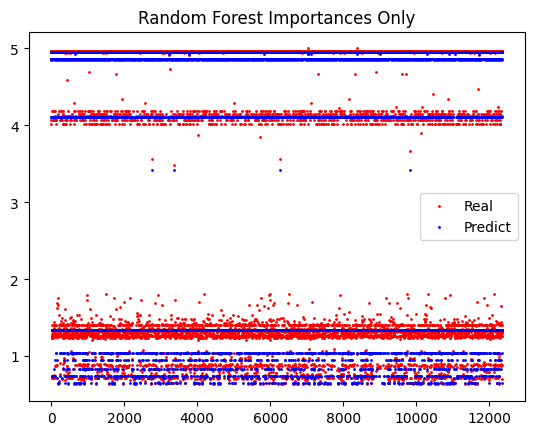

In [14]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
XtrainWithoutImport=[]
XtestWithoutImport=[]
for tra in range(0,len(Xtrain)):
    daArray=[]
    for col in range(0,len(Xtrain[tra])):
        if(col==54 or col==99 or col==100):
            daArray.append(Xtrain[tra][col])
    XtrainWithoutImport.append(daArray)
for tra in range(0,len(Xtest)):
    daArray=[]
    for col in range(0,len(Xtest[tra])):
        if(col==54 or col==99 or col==100):
            daArray.append(Xtest[tra][col])
    XtestWithoutImport.append(daArray)
model.fit(XtrainWithoutImport, ytrain)
ypred = model.predict(XtestWithoutImport)
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
mse = mean_squared_error(ytest, ypred)
rmse=math.sqrt(mse)
mape=mean_absolute_percentage_error(ytest, ypred)
print("訓練準確率: ",model.score(XtrainWithoutImport, ytrain))
print("測試準確率: ",model.score(XtestWithoutImport, ytest))
print("MSE: ", mse)
print("RMSE: ", rmse)
print("MAPE: ", mape)
import matplotlib.pyplot as plt 
x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, label="Real",color="red",s=1)
plt.scatter(x_ax, ypred, label="Predict",color="blue",s=1)
plt.title("Random Forest Importances Only")
plt.legend()
plt.show()